# RED WINE QUALITY PREDICTION

***OBJECTIVE:*** Use machine learning to determine which physiochemical properties make a wine good.We have a data of 1599 samples and 12 features to determine the quality of Wine. Quality of wine is rated from 0-10. 

### IMPORT MODULES

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### LOADING DATA 

In [159]:
data=pd.read_csv("WineQuality-Red.csv")
ds=pd.DataFrame(data=data)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [160]:
data.shape

(1599, 12)

In [161]:
data['quality'].value_counts() #count of quality column

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [162]:
data.describe() #Statistical info

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [163]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### PREPROCESSING DATA

In [164]:
#Checking Null Values
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [165]:
#there are no null values

### CHARTS AND PLOTS

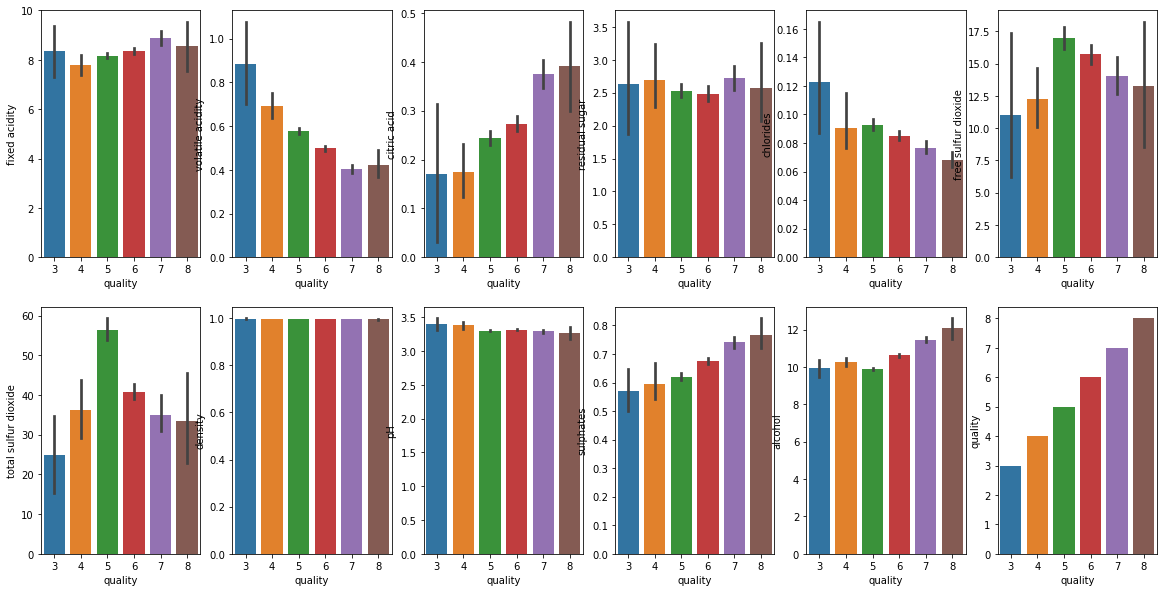

In [166]:
#plotting all attributes against quality attribute to find patterns
fig,ax= plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in ds.items():
    if col != 'type':
        sns.barplot(x='quality', y=col , data=ds, ax=ax[index])
        index+=1

In [167]:
#Checing all attributes against quality
index=0
for col, value in ds.items():
    if col != 'type':
        sns.boxplot(y=col, data=ds, ax=ax[index])
        index+= 1

Fixed Acidity   : No fixed pattern  
Voltile Acidity : Downward Trend (inversely propotional)  
Citric Acid     : Upward trend (propotional)  
Residual Sugar  : No fixed pattern  
Chlorides       : Downward trend  
Sulphur dioxide : No recognizable pattern  
Total sulphur dioxide : No pattern  
Sulphates       : upward trend  
ph value        : Slight downward trend  

In [168]:
data['quality'].value_counts() #count of quality column

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [169]:
# Classifying wine quality as Good or Bad based on quality rating
# "Bad" or 0 if quality is in range (1,6) including 6
# 'Good' or 1 if quality is in range (7,10)

ds['quality']=ds['quality'].apply(lambda x: 1 if x>6 else 0)
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:xlabel='quality', ylabel='count'>

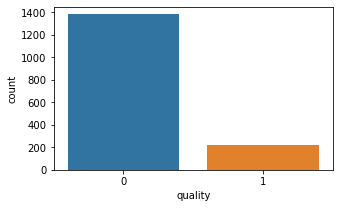

In [170]:
#Bar plot 'Good 1' vs 'Bad 0'
fig = plt.figure(figsize=(5,3))
sns.countplot(ds['quality'])

Majority is 'Bad 0'

### TRAIN TEST SPLIT

In [171]:
#Separating independent and dependent values
y=data['quality']
x=data.drop('quality',axis=1)

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

In [173]:
#applying standard scaling to the dataset, as there is huge difference in data in some columns.
sc=StandardScaler()

x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

### CREATE ALGORITHM

#### DECISION TREE ALGORITHM

In [174]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.846875
[[251  22]
 [ 27  20]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       273
           1       0.48      0.43      0.45        47

    accuracy                           0.85       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.84      0.85      0.84       320



ACCURACY 84.68%

#### SVC 

In [175]:
svc= SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.875
[[268   5]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



ACCURACY 87.5%

### TUNING ALGORITHM TO BEST PARAMETERS

In [176]:
#Finding parameters for svc

param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
grid_svc = GridSearchCV(svc, param_grid = param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(x_train,y_train)

In [ ]:
print("Best parmeters for svc :", grid_svc.best_params_)

In [ ]:
#Let’s run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))

***ACCURACY SCORE IMPROVED TO 89.68% WITH TUNING***

***Attribute Information***

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity 
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)